# Overview
In this notebook we look at how density measurements can help us model a probability distribution (probability density function). We will focus on the application of a [histogram](Histograms.ipynb) but other methods for approximating the density, such as [KDE](Kernel%20Density%20Estimation%20%28KDE%29.ipynb).

We will use python and some common data science libraries (numpy/pandas/matplotlib) to tabulate and visualize this concept.




TODO read this: 
https://answerminer.com/blog/binning-guide-ideal-histogram
https://plotly.com/chart-studio-help/histogram/

# 1. Connection Between Density and Probability

In the [histogram notebook](Histograms.ipynb) we discussed density as well as cumulative density approximations. We will see that density approximations can be used to approximate probability.

The histogram has a very intuitive connection with the frequentist definition of probability. The freuqnetist definition of probability defines the probability of the occurance of some event as:

$$ P(event) = \frac{\# \ similar \ events}{\# \ possible \ events} $$

As such, our table of frequencies can very easily be converted into a table of probabilities. We would divide the frequency of an event by the total number of distinct events in the sample.

As such, the histogram, or any other means of approximating a density, can be used to calculate an approximate probability.


# 2. Probability Mass Function Approximations
The Probability Mass Function (PMF) is the discrete function which gives the probability os some event occuring. By approximating the probability of a distrete random variable we are effectively approximating the PMF of the function.

## 2.1. Characteristics of a PMF

Mathematically speaking, probabilities (and probability spaces) have certain characteristics which we must adhere to in order to produce sound mathematical arguments.

In order to write functions for probability based on our histogram there are some basic characteristics which we need to adhere to:

1. $p(X = x) = f(x)$
2. $\sum p(x) = 1$
2. $p(X \in A) = p(x_i) +...+ p(x_a) $

So if we are defining $p(x) = \frac{\# \ events \ equal \ to \ x}{\# \ unique \ events}$ we will need to make sure it adheres to these properties. This goes for when we are using raw values or buckets.

## 2.2. Approximating a PMF using a Histogram
Mathematically, we can define our PMF as a function based on a frequency of discrete values as follows:

We start with a function $f$ which maps values from $X$ to $Y$.

$$ f:X \rightarrow Y$$

Which would be equivalent to writing $f: f(x_i) = y_i$ when $x_i \in X$ and $y_i \in Y$

The first step is to define some functions to help us describe our histogram. Recall that a histogram is based on intervals or buckets.

We can define functions to yield our bucket width ($w$), lower bound ($l$), and upper bound ($u$), respectively based on the number of buckets N we would like.

$$ w(Y) = \frac{Y_{max} - Y_{min}}{N}$$

$$ l(x_i) = \begin{cases}
x_i, \ \ \ \ \ \ \ \ \ \ (y_i - Y_{min}) \ \%  \ w(Y) = 0 \\
l(x_{i - 1}), \ \ \ otherwise
\end{cases} 
$$

$$ u(x_i) = l(x_i) + w(x_i) $$

Note: that the bucket width can also be arbitrarily specified.

We then define an indicator function which allows us to identify whether or not a value $x_i$ yields a value $y_i$ that is within a given bucket marked by the boundary points $1$ and $b$.

$$ 1(x_i, l, u) = \begin{cases}
1, \ if \ \ l <= f(x_i) < u \\
0, \ otherwise \\
\end{cases}
$$

And from this information we can construct our probability mass function (PMF) for a given bucket $b_i$. In other words, a function indicating the probability of obtaining a value $x_{i,j} \in b_i$.

$$ p(b_i) = \frac{\sum_{n = 0}^{N} I(x_n, l_i, u_i)}{N} $$



Now that we know the PMF for the bucket we can also define a PMF for the discrete values that are part of a bucket.  

$$p(x) = \dots $$

But this is just a quick "sleight of hand" what we are actually doing is making the discretization of the raw data and the buckets equal. In other words, the bucket width will be adjusted to be equal to the minimal level of precision in our discretization 

For example, If the most precise measurement is in the form of a integer, a bucket width will be one integer long. If we are using decimal points to the hundretchs place, the bucket width would be 0.01, and so on.

An alternate methodology would be to apply a uniform probability to the elements in a bucket. Ie. divide the $p(b_i)$ by the number of precision units in the coresponding bucket. For example, if the bucket is 1 unit long, but the precision is 0.01, there would be 10 precision units in the bucket.

### 2.2.1. Notes on using the empirical PMF
The pmf is only as good as the emerical data and the bins we elect to create for the histogram. The pmf becomes more accurate and precise with more data and smaller buckets. that being said, this is not always possible in the real world. Our distributions may not look smooth, symmetrical, or ideal. In some cases we may want to use other techniques for approximating the PMF.

## 2.3. Simulate a Normal Random Variable
In this section we will generate some sample data fora normal random variable $X$ such that:

$$ X \sim \mathcal{N}(\mu=5, \sigma^2 = 0.75)$$

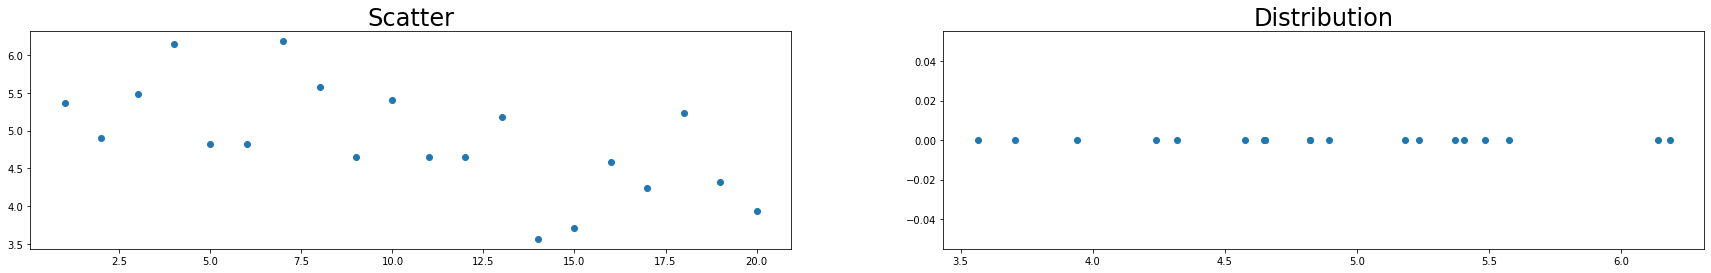

In [22]:
# Import some librearies to help us out
import numpy
from matplotlib import pyplot

# Define some population parameters
mu = 5
sigma = 0.75

# Create our sample data
numpy.random.seed(seed=42)
x = numpy.arange(1,21, 1)
y = numpy.random.normal(loc=mu, scale=sigma, size=x.shape[0])

# Plot the data
fig, (ax1, ax2) = pyplot.subplots(nrows=1, ncols=2)
ax1.scatter(x,y)
ax2.scatter(y, [0 for x in range(0, len(x))])
fig.set_figwidth(30)
ax1.set_title("Scatter", size=24)
ax2.set_title("Distribution", size=24);

With this data we will create histograms and calculate probabilities:

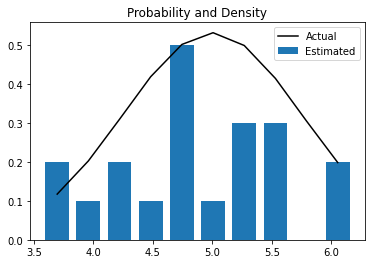

In [46]:
# Determine how many bins we want to use for our histogram
bins = 10

# Calculate the counts and bins for our numpy array
numpy_y = numpy.array(y)
counts, bin_edges = numpy.histogram(numpy_y, bins=bins)

# Calculate values for the x axis of the histogram
bin_midpoints = bin_edges[:-1] + (numpy.diff(bin_edges, 1) / 2)
p_mid = counts / bins

# Calculate the coresponding probabilities
import scipy.stats
f_mid = scipy.stats.norm.pdf(bin_midpoints, mu, sigma)

# Plot the histogram information as a bar chart
#
# Note: We set the witdh= parameter for the bar() function because 
#       by default it will glob bars together

fig, ax = pyplot.subplots(nrows=1, ncols=1)
ax.bar(bin_midpoints, p_mid, width=0.2, label="Estimated")
ax.plot(bin_midpoints, f_mid, label="Actual", c="black")

#fig.set_figwidth(30)
ax.set_title("Probability and Density")
ax.legend()
pyplot.show()

Notice how our approximation becomes more and more accurate as our sample size increases.

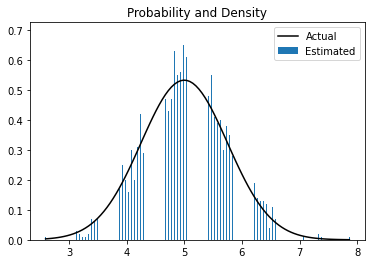

In [56]:
# Create our sample data
numpy.random.seed(seed=42)
x = numpy.arange(1,21, 0.01)
y = numpy.random.normal(loc=mu, scale=sigma, size=x.shape[0])

# Determine how many bins we want to use for our histogram
bins = 100

# Calculate the counts and bins for our numpy array
numpy_y = numpy.array(y)
counts, bin_edges = numpy.histogram(numpy_y, bins=bins)

# Calculate values for the x axis of the histogram
bin_midpoints = bin_edges[:-1] + (numpy.diff(bin_edges, 1) / 2)

# Calculate our empirical probabilities
bin_width = numpy.diff(bin_edges, 1)[0]
emperical_probabilities = counts / bins

# Calculate out theoretical values
from scipy.stats import norm
theoretical_probabilities = norm.pdf(bin_midpoints, loc=mu, scale=sigma)

# Plot the histogram information as a bar chart
#
# Note: We set the witdh= parameter for the bar() function because 
#       by default it will glob bars together

fig, ax = pyplot.subplots(nrows=1, ncols=1)
ax.bar(bin_midpoints, emperical_probabilities, width=0.01, label="Estimated")
ax.plot(bin_midpoints, theoretical_probabilities, label="Actual", c="black")

#fig.set_figwidth(30)
ax.set_title("Probability and Density")
ax.legend()
pyplot.show()

We can see here that some points are missing in the distribution and some points are over or under estimated.

**Note**: We are using a visual technique here to show the similarity in predictions. The thickness of the bars can be misleading in terms of showing the area under the curve.

# 3. Additional Techniques for Empiricle Probabilities

Calculating epirical probabilites using histograms is fairly straight forward. That being said, there are some issues with this simple method:

1. We cannot make probability statements for events we have not directly witnessed
2. We cannot be more precise than the bins we have created or the points we have seen (no interpolation)

As mentioned earlier, if we know the discretization and the level of precision, we can apply various techniques to "share the probability" between the points in the bucket. For example: divide the probability of the bucket evenly between the points in the bucket. This simple model however may not be ideal or realistic.

We could try interpolation between the frequencies as a way of smoothing things out over a continuous interval. But this would yield values which do not conform to the requirements of a probability distribution. Specifically, the sum of the probabilities (the area under the curve) would not necessarily equal 1.

As a result, other techniques, like [kernel density estimation (KDE)](Kernel%20Density%20Estimation%20%28KDE%29.ipynb) or the [generalized Lambda Distribution (GLD)](Intro%20To%20Generalized%20Lambda%20Distribution%20%28GLD%29.ipynb) have been developed for this process.

We have covered some of these techniques in other workbooks.